
# PRINCIPAL COMPONENT ANALYSIS (PCA)

Principal component analysis is essentially a statistical procedure to convert an observation set
of possibly correlated variables into a set of linearly uncorrelated variable values.

Each of the principal components is chosen such that it describes most of the available variation
and all of these principal components are orthogonal to each other.

In all principal components,
the first principal component has the maximum variance.
These are done within a square symmetric matrix. It can be
- a pure matrix of sums of squares and cross products
-  a covariance matrix
- or a correlation matrix.

A correlation matrix is used if the
individual variance differs greatly.

We will now put into practice one of the main applications of PCA, which is the dimensional
reduction of data with practically no loss of information.

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA

Generate the data to be used for this exercise.

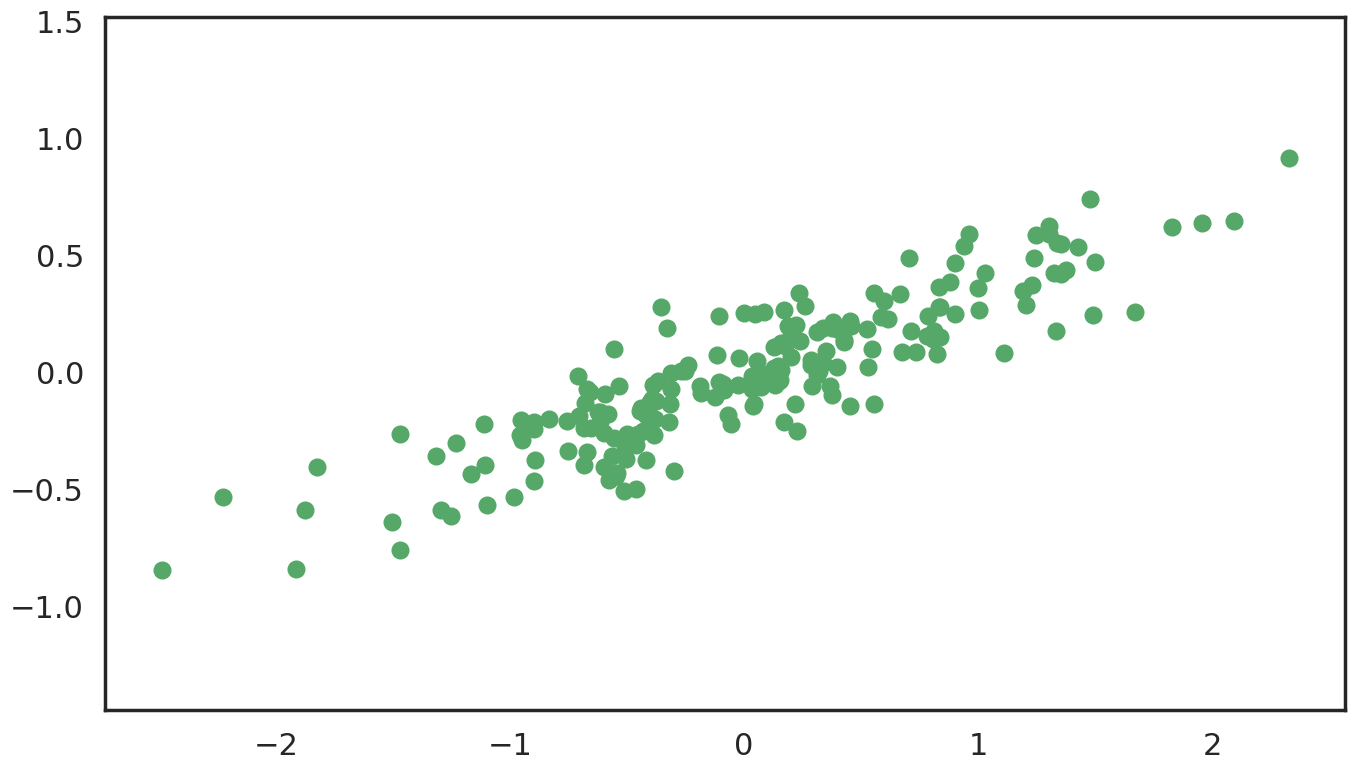

In [109]:
#generate data
np.random.seed(1)
X = np.dot(np.random.random(size=(2,2)), np.random.normal(size=(2,200))).T
plt.plot(X[:,0], X[:,1],'og')
plt.axis('equal')
plt.show()

Calculate the principal components.

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


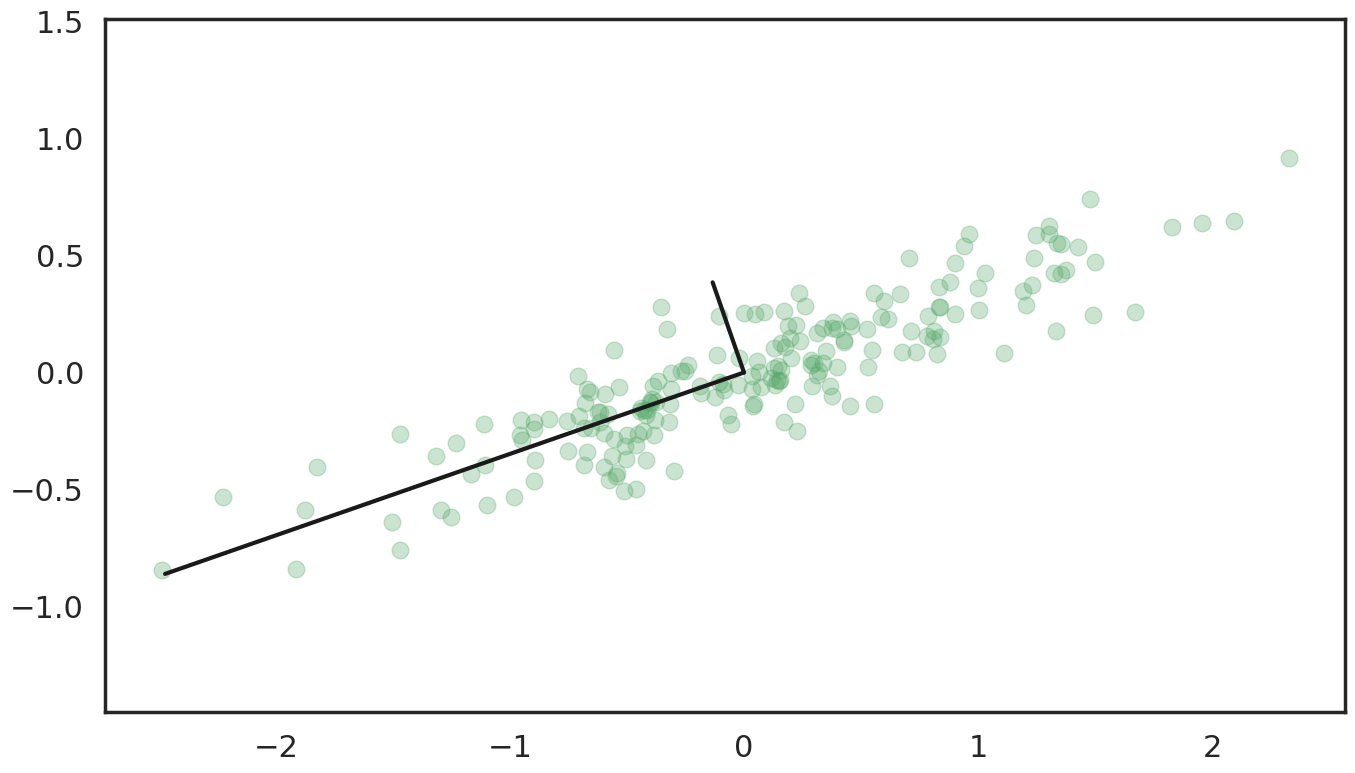

In [110]:
#calculate principal components

pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

plt.plot(X[:,0], X[:,1], 'og', alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0,v[0]],[0,v[1]], '-k', lw=3)
plt.axis('equal')
plt.show()


Note that one direction is very important, while the other is not. This shows us that the second
principal component could be completely ignored without much loss of information! Let's see what
the data looks like if we only keep 95% of the variance:

In [111]:
clf = PCA(0.95)
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


By specifying that we want to remove 5% of the variance, the data is now compressed by a factor
of 50%. After this compression, the data looks as follows:

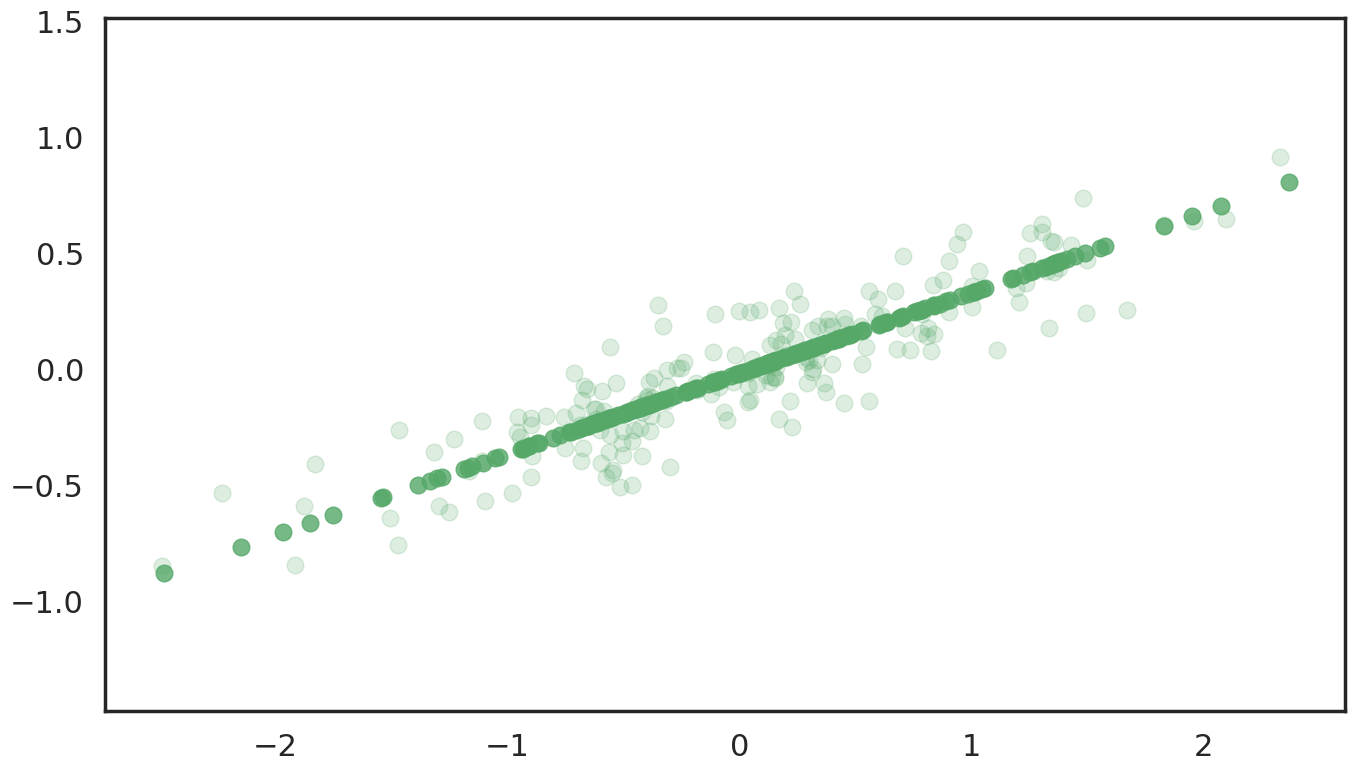

In [112]:
#specifying that we want to remove 5% of the variance,
# the data is now compressed by a factor of 50%.  The data now looks like:

X_new = clf.inverse_transform(X_trans)
plt.plot(X[:,0],X[:,1],'og',alpha=0.2)
plt.plot(X_new[:,0],X_new[:,1],'og',alpha=0.8)
plt.axis('equal')
plt.show()